<a href="https://colab.research.google.com/github/teotavares2/RecPad/blob/main/Projeto_Rec_Pad_Digits_vFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digits vFinal

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score,recall_score, precision_score, confusion_matrix, roc_curve, classification_report, accuracy_score
from time import time,sleep
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import os
%matplotlib inline
import _pickle as cPickle
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Mounted at /content/drive


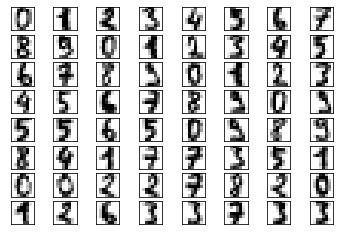

In [ ]:
digits = load_digits()

fig = plt.figure()
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

In [ ]:
print(digits.data.shape)

(1797, 64)


In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model_lrc = LogisticRegression()
model_dtc = DecisionTreeClassifier(max_depth = 2)
model_svc = SVC(probability=True)
model_knn = KNeighborsClassifier(n_neighbors = 2)
model_gnb = GaussianNB()
model_mlp = MLPClassifier()
model_rfc = RandomForestClassifier(n_estimators=10, random_state=42)

models =[model_lrc, 
         model_dtc, 
         model_svc, 
         model_knn, 
         model_gnb,
         model_mlp,
         model_rfc,
        ]          
classifier = ['LogisticRegression',
              'DecisionTreeClassifier',
              'SupportVectorClassifier',
              'KNeighborsClassifier',
              'GaussianNB',
              'MLPClassifier',
              'RandomForestClassifier',
              ]

In [ ]:
# Unique Classifier without PCA
log_file = open('/content/drive/MyDrive/RecPad/Logs/digits.log','a') 

for x in range(len(models)):
  t0 = time()
  model = models[x].fit(X_train, y_train)
  t1 = (time() - t0)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred) * 100
  print('{},{:.2f}%,{:.2f}s \n'.format(classifier[x],accuracy,t1))
  log_file.write('{},{:.2f},{:.2f} \n'.format(classifier[x],accuracy,t1))
log_file.close() 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression,96.44%,0.40s 

DecisionTreeClassifier,31.33%,0.01s 

SupportVectorClassifier,98.22%,0.54s 

KNeighborsClassifier,99.33%,0.01s 

GaussianNB,84.44%,0.00s 

MLPClassifier,96.89%,2.47s 

RandomForestClassifier,93.78%,0.06s 



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Unique Classifier with PCA
log_file = open('/content/drive/MyDrive/RecPad/Logs/digits.log','a') 

pca = PCA(.80)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

for x in range(len(models)):
  t0 = time()
  model = models[x].fit(X_train_pca, y_train)
  t1 = (time() - t0)
  y_pred = model.predict(X_test_pca)
  accuracy = accuracy_score(y_test, y_pred) * 100
  print('{}PCA,{:.2f}%,{:.2f}s \n'.format(classifier[x],accuracy,t1))
  log_file.write('{}PCA,{:.2f},{:.2f} \n'.format(classifier[x],accuracy,t1))
log_file.close()  

LogisticRegressionPCA,93.56%,0.09s 

DecisionTreeClassifierPCA,27.56%,0.01s 

SupportVectorClassifierPCA,98.44%,0.21s 

KNeighborsClassifierPCA,98.22%,0.00s 

GaussianNBPCA,92.22%,0.00s 

MLPClassifierPCA,96.89%,2.16s 

RandomForestClassifierPCA,93.33%,0.08s 



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# PCA
# pca = PCA(.80)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

In [ ]:
# Classifiers
#model.get_params().keys()

classifiers =[]
mlp = MLPClassifier(random_state=123, verbose=1, batch_size=64, max_iter=400,early_stopping = True)
classifiers.append(mlp)

knn = KNeighborsClassifier(n_jobs=-1, algorithm='auto')
classifiers.append(knn)

svm = SVC(probability=True)
classifiers.append(svm)

# Classifiers Parameters
parameters=[]
parameters_mlp = {'activation': ['identity','logistic','tanh','relu'], 
                  'solver':['lbfgs','sgd','adam'], 
                 'learning_rate':['constant','invscaling','adaptive'],}
parameters.append(parameters_mlp)
parameters_knn = {"n_neighbors": [2,4,8,16,32],
                 "weights": ['uniform','distance'],
                 "p":[1,2,3]}
parameters.append(parameters_knn)
parameters_svm = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                 'decision_function_shape':('ovo', 'ovr'),
                 'C':[1, 10]
                 }
parameters.append(parameters_svm)

# Classifiers Names
names = ['MLPClassifier',
        'KNeighborsClassifier',
        'SupportVectorClassifier',
        ]

In [ ]:
# Best Classifiers with GridSearchCV

def gridSearchCV(models,params,count):
    best_models=[]
    for i in tqdm(range(0,count)):
        model_grid = GridSearchCV(models[i], parameters[i], n_jobs=-1, verbose=1, cv=5)
        model_grid.fit(X_train,y_train)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(classifiers,parameters,3)

log_file = open('/content/drive/MyDrive/RecPad/Logs/digits_best_estimators.log','a') 
log_file.write("\nThe best estimators are:\n")
for i in range(len(classifiers)):
  log_file.write("\n")
  log_file.write(str(best_model_list[i]))
log_file.close() 

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished
 33%|███▎      | 1/3 [01:04<02:08, 64.25s/it][Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   42.8s finished
 67%|██████▋   | 2/3 [01:47<00:51, 51.67s/it][Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   16.7s finished
100%|██████████| 3/3 [02:04<00:00, 41.37s/it]


In [ ]:
# Classifiers with GridSearchCV

df = pd.DataFrame()
best_models=[]
path='/content/drive/MyDrive/RecPad/Models/'
log_file = open('/content/drive/MyDrive/RecPad/Logs/digits.log','a') 
 
for x in range(len(best_model_list)):
  model = best_model_list[x]
  t0 = time()
  model.fit(X_train,y_train)
  t1 = (time() - t0)
  name=path+names[x]+'.pkl'
  with open(name, 'wb') as clf:
	  cPickle.dump(model, clf)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred) * 100
  print('{},{:.2f}%,{:.2f}s \n'.format(names[x],accuracy,t1))
  log_file.write('{},{:.2f},{:.2f} \n'.format(names[x],accuracy,t1))
log_file.close()   

MLPClassifier,96.67%,0.46s 

KNeighborsClassifier,99.11%,0.01s 

SupportVectorClassifier,98.44%,0.27s 



In [ ]:
# Votting Classifier Soft
log_file = open('/content/drive/MyDrive/RecPad/Logs/digits.log','a') 
path='/content/drive/MyDrive/RecPad/Models/'
name=''

vot_clf = VotingClassifier(estimators=[('mlp', best_model_list[0]), 
                                       ('knn', best_model_list[1]),
                                       ('svm', best_model_list[2])
                                       ], 
                           voting='soft',n_jobs=-1)
t0 = time()
vot_clf.fit(X_train,y_train)
t1 = (time() - t0)
print(vot_clf.estimators_)
y_predict = vot_clf.predict(X_test)
name=path+'VottingSoft.pkl'
with open(name, 'wb') as clf:
	cPickle.dump(vot_clf, clf) 
accuracy = accuracy_score(y_test, y_predict) * 100
print('VottingSoft,{:.2f}%,{:.2f}s \n'.format(accuracy,t1))
log_file.write('VottingSoft,{:.2f},{:.2f} \n'.format(accuracy,t1))
log_file.close() 

[MLPClassifier(activation='tanh', alpha=0.0001, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
                     weights='distance'), SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)]
VottingSoft,98.22%,0.51s 



In [ ]:
# Votting Classifier Hard
log_file = open('/content/drive/MyDrive/RecPad/Logs/digits.log','a') 
path='/content/drive/MyDrive/RecPad/Models/'
name=''

vot_clf = VotingClassifier(estimators=[('mlp', best_model_list[0]), 
                                       ('knn', best_model_list[1]),
                                       ('svm', best_model_list[2])
                                       ], 
                           voting='hard',n_jobs=-1)
vot_clf.fit(X_train,y_train)
print(vot_clf.estimators_)
y_predict = vot_clf.predict(X_test)
name=path+'VottingHard.pkl'
with open(name, 'wb') as clf:
	cPickle.dump(vot_clf, clf) 
accuracy = accuracy_score(y_test, y_predict) * 100
print('VottingHard,{:.2f}%,{:.2f}s \n'.format(accuracy,t1))
log_file.write('VottingHard,{:.2f},{:.2f} \n'.format(accuracy,t1))
log_file.close() 

[MLPClassifier(activation='tanh', alpha=0.0001, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=3,
                     weights='distance'), SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)]
VottingHard,98.44%,0.51s 



In [ ]:
# Stacking Classifiers without GridSearchCV
log_file = open('/content/drive/MyDrive/RecPad/Logs/digits.log','a') 
path='/content/drive/MyDrive/RecPad/Models/'

for x in range(len(best_model_list)):
  for y in range(len(best_model_list)):
    if x != y:
      estimators = [(names[x],best_model_list[x])]
      stacking = StackingClassifier(estimators=estimators,final_estimator=best_model_list[y])
      t0 = time()
      stacking.fit(X_train, y_train)
      t1 = (time() - t0)
      y_pred_stacking = stacking.predict(X_test)
      name=path+names[x]+names[y]+'Stacking.pkl'
      with open(name, 'wb') as clf:
        cPickle.dump(stacking, clf) 
      accuracy = accuracy_score(y_test, y_pred_stacking) * 100
      print('Stacking{}{},{:.2f}%,{:.2f}s\n'.format(names[x],names[y],accuracy,t1))
      log_file.write('Stacking{}{},{:.2f},{:.2f}\n'.format(names[x],names[y],accuracy,t1))
log_file.close() 

StackingMLPClassifierKNeighborsClassifier,96.67%,2.24s

StackingMLPClassifierSupportVectorClassifier,96.67%,2.34s

StackingKNeighborsClassifierMLPClassifier,98.22%,5.20s

StackingKNeighborsClassifierSupportVectorClassifier,98.00%,3.59s

StackingSupportVectorClassifierMLPClassifier,97.56%,2.41s

StackingSupportVectorClassifierKNeighborsClassifier,98.44%,1.35s



In [ ]:
# Final Avaliation 

pasta = '/content/drive/MyDrive/RecPad/Models/'
best_classifiers = list()
best_models = list()

# Pegar os arquivos do diretórios com os modelos treinados e colocando na lista best_classifiers
for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        best_classifiers.append(os.path.join(diretorio, arquivo))
        best_models.append(arquivo)

# Pegar os arquivos do diretórios com os modelos treinados e colocando na lista models
files = list()
for model in best_models:
  files.append(model[:-4])
best_models = files

for x in range(len(best_classifiers)):
  for i in range(30):
    name = '/content/drive/MyDrive/RecPad/Results/'+str(best_models[x])+'.csv'
    log_file = open(name,'a') 
    logs = list()
    with open(best_classifiers[x], 'rb') as classifier:
      clf = cPickle.load(classifier)
    t0 = time()
    y_pred = clf.predict(X_test)
    t1 = (time() - t0)
    accuracy = accuracy_score(y_test, y_pred) * 100
    log_file.write('{},{:.2f},{:.2f}\n'.format(best_models[x],accuracy,t1))
    log_file.close() 


In [ ]:
pasta = '/content/drive/MyDrive/RecPad/Results/'
best_results = list()

for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        best_results.append(os.path.join(diretorio, arquivo))

best_results

['/content/drive/MyDrive/RecPad/Results/MLPClassifier.csv',
 '/content/drive/MyDrive/RecPad/Results/KNeighborsClassifier.csv',
 '/content/drive/MyDrive/RecPad/Results/SupportVectorClassifier.csv',
 '/content/drive/MyDrive/RecPad/Results/VottingSoft.csv',
 '/content/drive/MyDrive/RecPad/Results/VottingHard.csv',
 '/content/drive/MyDrive/RecPad/Results/MLPClassifierKNeighborsClassifierStacking.csv',
 '/content/drive/MyDrive/RecPad/Results/MLPClassifierSupportVectorClassifierStacking.csv',
 '/content/drive/MyDrive/RecPad/Results/KNeighborsClassifierMLPClassifierStacking.csv',
 '/content/drive/MyDrive/RecPad/Results/KNeighborsClassifierSupportVectorClassifierStacking.csv',
 '/content/drive/MyDrive/RecPad/Results/SupportVectorClassifierMLPClassifierStacking.csv',
 '/content/drive/MyDrive/RecPad/Results/SupportVectorClassifierKNeighborsClassifierStacking.csv']

In [ ]:
log_file = open('/content/drive/MyDrive/RecPad/digits_results.log','a') 

for result in range(len(best_results)):
  df = pd.read_csv(best_results[result])
  df.columns=['Model', 'Accuracy','Time']
  # print(df.head(5))
  print('{},{:.2f},{:.2f}\n'.format(df.iloc[0,0],df['Accuracy'].mean(),df['Time'].mean()))
  log_file.write('{},{:.2f},{:.2f}\n'.format(df.iloc[0,0],df['Accuracy'].mean(),df['Time'].mean()))

log_file.close() 

MLPClassifier,96.67,0.00

KNeighborsClassifier,99.11,1.41

SupportVectorClassifier,98.44,0.02

VottingSoft,98.22,1.46

VottingHard,98.44,1.46

MLPClassifierKNeighborsClassifierStacking,96.67,0.17

MLPClassifierSupportVectorClassifierStacking,96.67,0.01

KNeighborsClassifierMLPClassifierStacking,98.22,1.44

KNeighborsClassifierSupportVectorClassifierStacking,98.00,1.41

SupportVectorClassifierMLPClassifierStacking,97.56,0.03

SupportVectorClassifierKNeighborsClassifierStacking,98.44,0.12

